In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from matplotlib import rcParams
rcParams['font.size'] = 20
from numpy.random import randn

## Exemple fictif "Champagne / Espérance de vie"

On fabrique des données fictives :
* `x` la consommation annuelle de champagne
* `y` l'espérance de vie
* `z` les revenus
* `z_obs` les revenus "observés"

In [2]:
np.random.seed(42)
N = 300

# Niveau de vie
z = 2000 + 500 * randn(N)

# Champagne et espérance de vie, qui ne dépendent que des revenus
x = 0 + 0.01 * z + 5 * randn(N)
y = 75 + 0.005 * z + 2.5 * randn(N)

# Revenus observés
sigma_z = 500
z_obs = z + sigma_z * randn(N)
df = pd.DataFrame({'x':x, 'y':y, 'z':z, 'z_obs':z_obs})

On trace tout ça

(0.0, 4000.0)

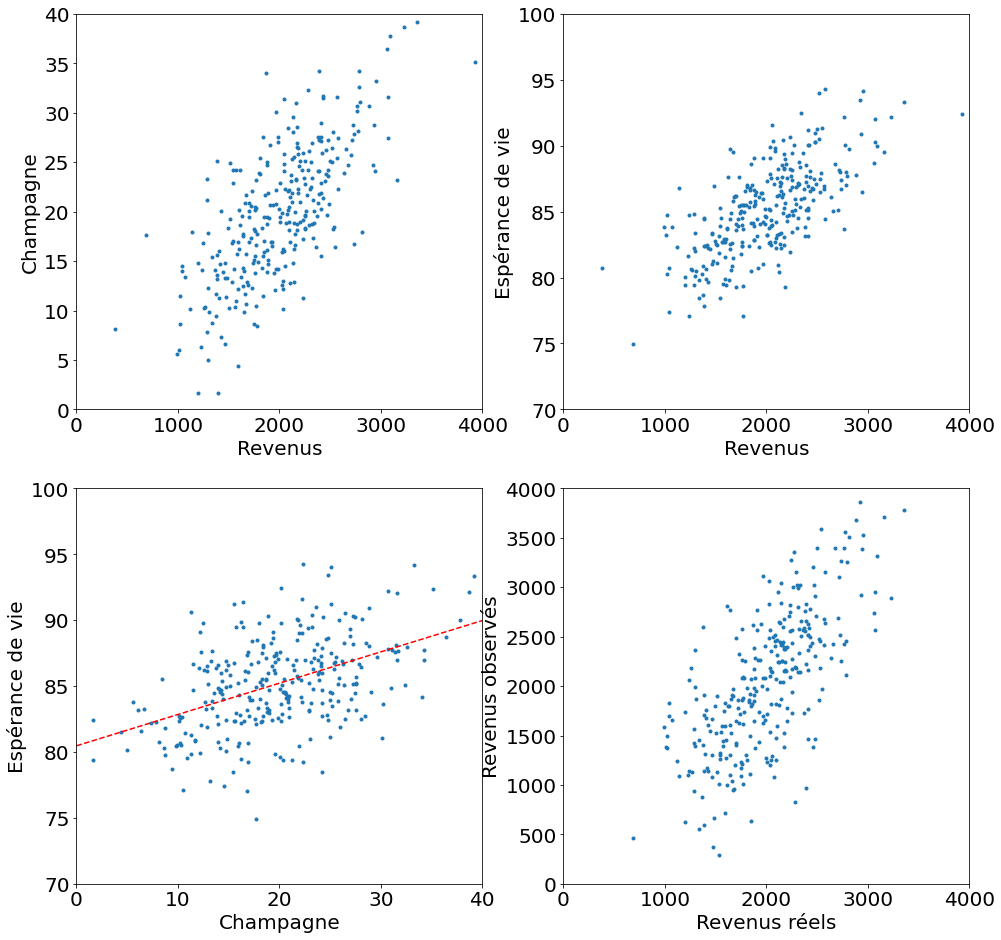

In [3]:
ESPE_MIN = 70
ESPE_MAX = 100
CHAMP_MIN = 0
CHAMP_MAX = 40
REVN_MIN = 0
REVN_MAX = 4000

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.plot(z,x,'.')
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(CHAMP_MIN, CHAMP_MAX)
plt.xlabel("Revenus")
plt.ylabel("Champagne")
plt.subplot(222)
plt.plot(z,y,'.')
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(ESPE_MIN, ESPE_MAX)
plt.xlabel("Revenus")
plt.ylabel("Espérance de vie")
plt.subplot(223)
plt.plot(x,y,'.')
plt.xlim(CHAMP_MIN, CHAMP_MAX)
plt.ylim(ESPE_MIN, ESPE_MAX)
plt.xlabel("Champagne")
plt.ylabel("Espérance de vie")

ab = smf.ols("y ~ x",data=df).fit().params
plt.plot([CHAMP_MIN, CHAMP_MAX],[ab[0]+ab[1]*CHAMP_MIN,ab[0]+ab[1]*CHAMP_MAX],'r--')


plt.subplot(224)
plt.plot(z,z_obs,'.')
plt.xlabel("Revenus réels")
plt.ylabel("Revenus observés")
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(REVN_MIN, REVN_MAX)

Le $R^2$ et la p-value sans corriger par z

In [4]:
fit = smf.ols("y ~ x",data=df).fit()
fit.rsquared, fit.pvalues['x']

(0.21726405187655995, 1.3790558772854585e-17)

Idem en corrigeant par z

In [5]:
fit = smf.ols("y ~ z + x",data=df).fit()
fit.rsquared, fit.pvalues['x']

(0.4751189613656831, 0.571090700558113)

On voit que le $p$ n'est plus significatif.

Et maintenant en corrigeant par z_obs

In [6]:
fit = smf.ols("y ~ z_obs + x",data=df).fit()
fit.rsquared, fit.pvalues['x']

(0.3116610997704353, 1.4910150244149986e-07)

## Graphiques

### Corrélation initiale

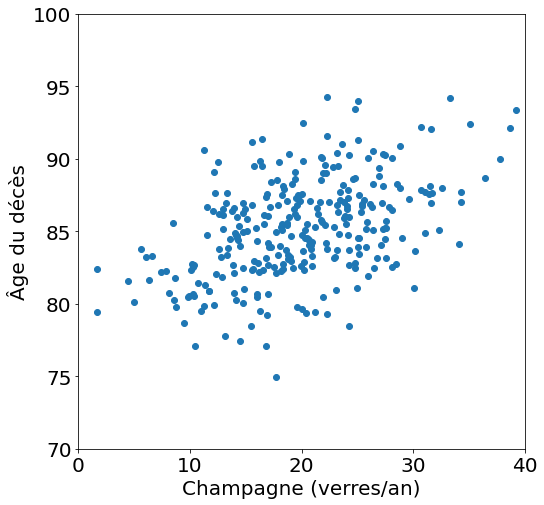

In [7]:
plt.figure(figsize=(8,8))
plt.plot(x,y,'o')
plt.xlim(CHAMP_MIN, CHAMP_MAX)
plt.ylim(ESPE_MIN, ESPE_MAX)
plt.xlabel("Champagne (verres/an)")
plt.ylabel("Âge du décès")
plt.savefig("1-CorrInit.png")

Avec corrélation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     82.72
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.38e-17
Time:                        17:09:11   Log-Likelihood:                -758.64
No. Observations:                 300   AIC:                             1521.
Df Residuals:                     298   BIC:                             1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.4722      0.548    146.883      0.000      79.394      81.550
x              0.2376      0.026      9.095      0.000       0.186       0.289
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.209
Skew:                           0.040   Prob(JB):                        0.901
Kurtosis:                       3.102   Cond. No.                         65.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

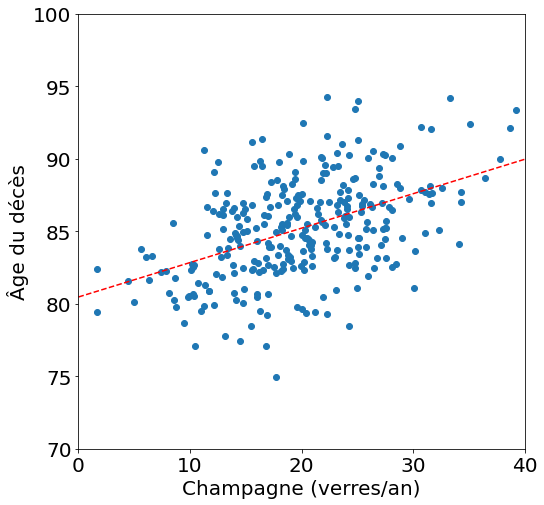

In [8]:
plt.figure(figsize=(8,8))
plt.plot(x,y,'o')
plt.xlim(CHAMP_MIN, CHAMP_MAX)
plt.ylim(ESPE_MIN, ESPE_MAX)
plt.xlabel("Champagne (verres/an)")
plt.ylabel("Âge du décès")
fit = smf.ols("y ~ x",data=df).fit()
ab = fit.params
plt.plot([CHAMP_MIN, CHAMP_MAX],[ab[0]+ab[1]*CHAMP_MIN,ab[0]+ab[1]*CHAMP_MAX],'r--')
plt.savefig("2-CorrInit_droite.png")
fit.summary()

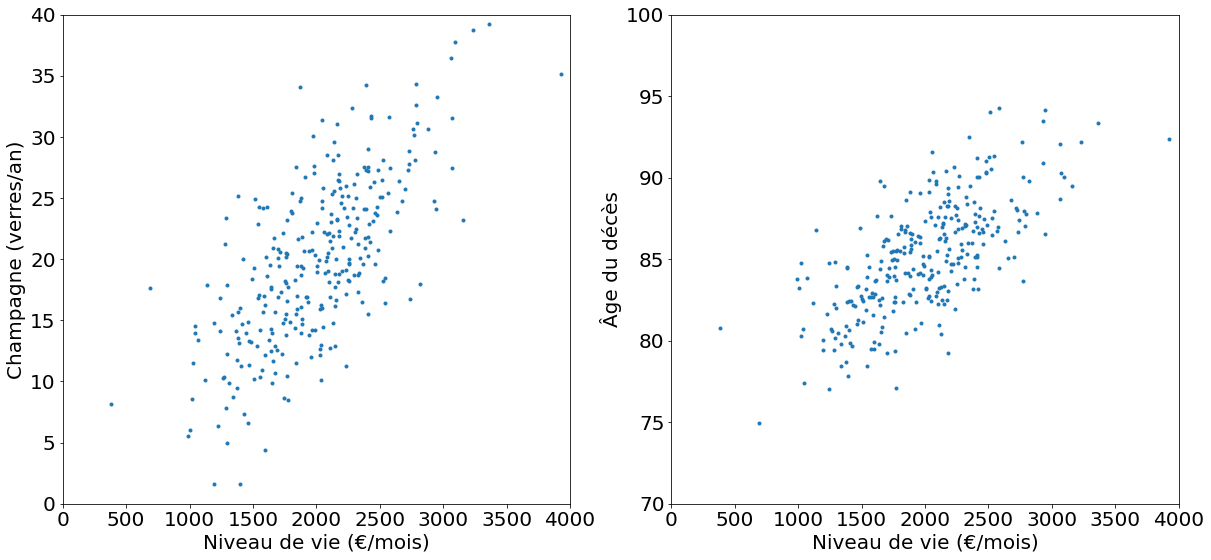

In [9]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.plot(z,x,'.')
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(CHAMP_MIN, CHAMP_MAX)
plt.xlabel("Niveau de vie (€/mois)")
plt.ylabel("Champagne (verres/an)")
plt.subplot(122)
plt.plot(z,y,'.')
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(ESPE_MIN, ESPE_MAX)
plt.xlabel("Niveau de vie (€/mois)")
plt.ylabel("Âge du décès")
plt.savefig("3-Confusion.png")

### Revenu bruité

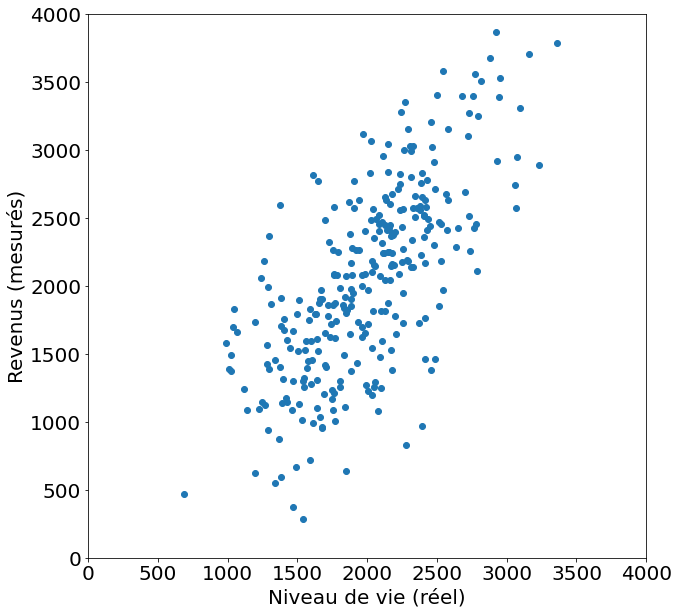

In [10]:
plt.figure(figsize=(10,10))
plt.plot(z,z_obs,'o')
plt.xlim(REVN_MIN, REVN_MAX)
plt.ylim(REVN_MIN, REVN_MAX)
plt.xlabel("Niveau de vie (réel)")
plt.ylabel("Revenus (mesurés)")
plt.savefig("4-Revenus.png")

## Etude systématique

On va faire une analyse systématique sur des données simplifiées. On génère un échantillon de taille `N`

* `z` une gaussienne de moyenne 0 et d'écart-type 1
* `x` et `y` ne dépendent que de `z` avec un bruit gaussien
* `z_obs` idem

Et on retourne la p-value obtenue en contrôlant par `z_obs`

In [11]:
def generate_sample(N, sigma_z, sigma_xy):
    z = randn(N)
    x = z + sigma_xy * randn(N)
    y = z + sigma_xy * randn(N)
    z_obs = z + sigma_z * randn(N)
    df = pd.DataFrame({'x':x, 'y':y, 'z':z, 'z_obs':z_obs})
    return smf.ols("y ~ z_obs + x",data=df).fit().pvalues['x']

On va faire du Monte-Carlo en faisant ça $K$ fois et en comptant le taux de faux positif (où on a $p<0.05$). On balaye pour différents $\sigma_z$ (qui contrôle la fiabilité du proxy) et différents $\sigma_{xy}$ qui contrôle l'importance du facteur de confusion

In [12]:
N = 100
K = 100

sigma_xy_list = np.arange(0.5,2.75,0.25)
sigma_z_list = np.arange(0.2,1.6,0.2)

all_res = []
for sigma_xy in sigma_xy_list:
    res = []
    for sigma_z in sigma_z_list:
        ps = np.zeros(K)
        for k in range(K):
            ps[k] = generate_sample(N,sigma_z,sigma_xy)    
        res.append(sum(ps < 0.05)/K)
    all_res.append(res)

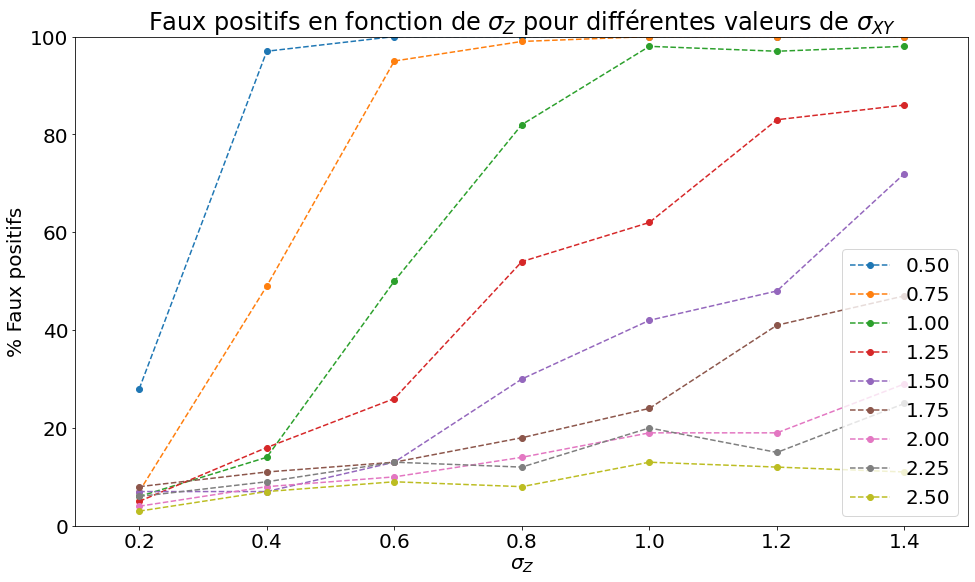

In [13]:
plt.figure(figsize=(16,9))
for res,sigma_xy in zip(all_res,sigma_xy_list):
    plt.plot(sigma_z_list,[100*pc for pc in res],'o--',label="{:.2f}".format(sigma_xy))
plt.xlabel("$\sigma_Z$")
plt.ylabel("% Faux positifs")
plt.xlim(0.1,1.5)
plt.ylim(0,100)
plt.legend(loc="lower right")
plt.title("Faux positifs en fonction de $\sigma_Z$ pour différentes valeurs de $\sigma_{XY}$")
plt.savefig("MonteCarlo.png")

## Lien avec papier

Dans le papier ils parent de reliability de z_obs comme ratio de la variance de z_obs sur celle de de z. On a choisi un `z` de variance 1 et les variances s'ajoutent pour `z_obs` donc on a 
$$ r = \frac{1}{1+\sigma_z^2}$$

Donc par exemple $\sigma_z = 1$ correspond à une *reliability* de 0.5

Ils utilisent également la corrélation partielle pour mesurer la force du facteur de confusion.

## Variantes

Et si le facteur de confusion observé est égal à une version catégorisée du facteur de confusion vrai ?

In [14]:
sigma_xy = 1
sigma_z = 1
N = 300
K = 1000
cnt = 0
NCAT = 5

for k in range(K):
    z = randn(N)
    x = z + sigma_xy * randn(N)
    y = z + sigma_xy * randn(N)
    z_obs = z + sigma_z * randn(N)
    z_cat = pd.cut(z,bins=np.linspace(-3,3,NCAT+1))
    df = pd.DataFrame({'x':x, 'y':y, 'z':z, 'z_obs':z_obs, 'z_cat':z_cat})
    pvalue = smf.ols("y ~ z_cat + x",data=df).fit().pvalues['x']
    if(pvalue<0.05): 
        cnt = cnt + 1
print(cnt)

365


Ici avec 5 catégories on a quand même quasi 40% de faux positifs !